In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [3]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

[['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000']]
(2000, 4)


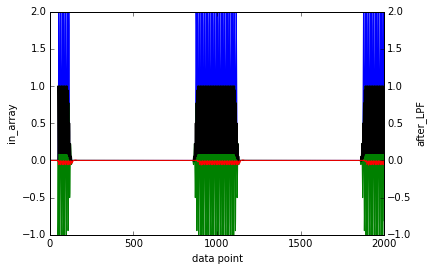

In [6]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

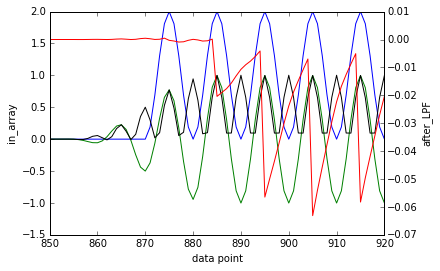

In [9]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(850,920)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

[['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000']]
(2000, 4)


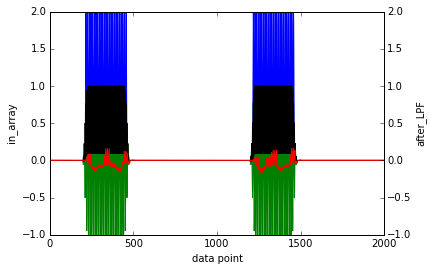

In [10]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

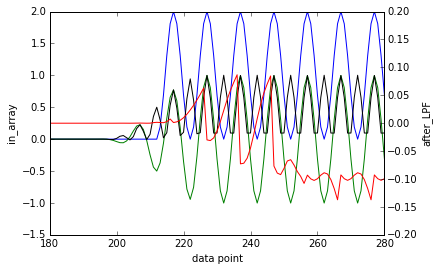

In [14]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(180,280)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');